In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [18]:
df = pd.read_excel('semi_arid_farming_data.xlsx', engine='calamine')

In [4]:
pip install python-calamine


   ---------------------------------------- 0.0/638.2 kB ? eta -:--:--
   -- ------------------------------------ 41.0/638.2 kB 991.0 kB/s eta 0:00:01
   ------- -------------------------------- 122.9/638.2 kB 1.0 MB/s eta 0:00:01
   ------------ --------------------------- 194.6/638.2 kB 1.2 MB/s eta 0:00:01
   -------------- ------------------------- 235.5/638.2 kB 1.3 MB/s eta 0:00:01
   ------------------- -------------------- 317.4/638.2 kB 1.3 MB/s eta 0:00:01
   ------------------------ --------------- 389.1/638.2 kB 1.4 MB/s eta 0:00:01
   --------------------------- ------------ 440.3/638.2 kB 1.4 MB/s eta 0:00:01
   ------------------------------- -------- 501.8/638.2 kB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 532.5/638.2 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 604.2/638.2 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------  634.9/638.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  634.9


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Impact of Rainwater Harvesting on Crop Yield Increase 

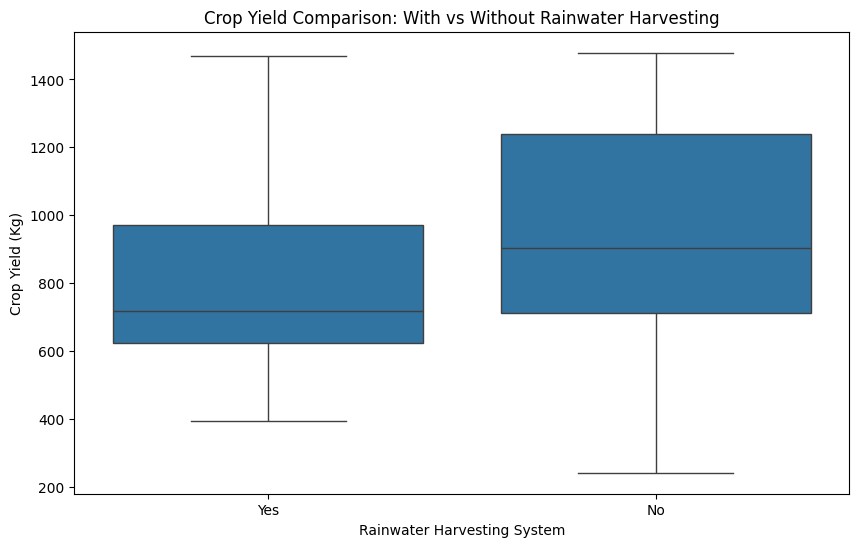

In [7]:
# Create a box plot comparing crop yields for farms with and without rainwater harvesting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rainwater Harvesting System (Yes/No)', y='Crop Yield (Kg)', data=df)
plt.title('Crop Yield Comparison: With vs Without Rainwater Harvesting')
plt.xlabel('Rainwater Harvesting System')
plt.ylabel('Crop Yield (Kg)')
plt.show()

#### Summary Statistics 

In [8]:
# summary statistics
with_harvesting = df[df['Rainwater Harvesting System (Yes/No)'] == 'Yes']['Crop Yield (Kg)']
without_harvesting = df[df['Rainwater Harvesting System (Yes/No)'] == 'No']['Crop Yield (Kg)']

print("\
Summary Statistics for Crop Yield (Kg):")
print("With Rainwater Harvesting:")
print(with_harvesting.describe())
print("\
Without Rainwater Harvesting:")
print(without_harvesting.describe())

Summary Statistics for Crop Yield (Kg):
With Rainwater Harvesting:
count       9.000000
mean      806.785556
std       332.333311
min       395.930000
25%       623.750000
50%       718.470000
75%       970.510000
max      1469.600000
Name: Crop Yield (Kg), dtype: float64
Without Rainwater Harvesting:
count      16.000000
mean      909.048125
std       361.440128
min       242.970000
25%       712.910000
50%       904.485000
75%      1239.407500
max      1478.450000
Name: Crop Yield (Kg), dtype: float64


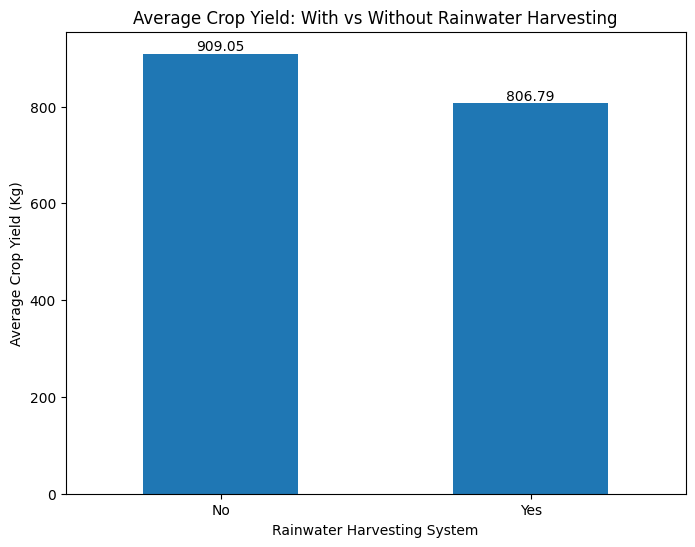

In [9]:
# Create a bar chart comparing average yields
avg_yields = df.groupby('Rainwater Harvesting System (Yes/No)')['Crop Yield (Kg)'].mean()
plt.figure(figsize=(8, 6))
avg_yields.plot(kind='bar')
plt.title('Average Crop Yield: With vs Without Rainwater Harvesting')
plt.xlabel('Rainwater Harvesting System')
plt.ylabel('Average Crop Yield (Kg)')
plt.xticks(rotation=0)
for i, v in enumerate(avg_yields):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.show()

#### Interestingly, farms without rainwater harvesting systems show a slightly higher average crop yield (909.05 kg) compared to those with rainwater harvesting (806.79 kg). However, there's considerable variation in both groups.

##  Impact of Rainwater Harvesting on Water Usage

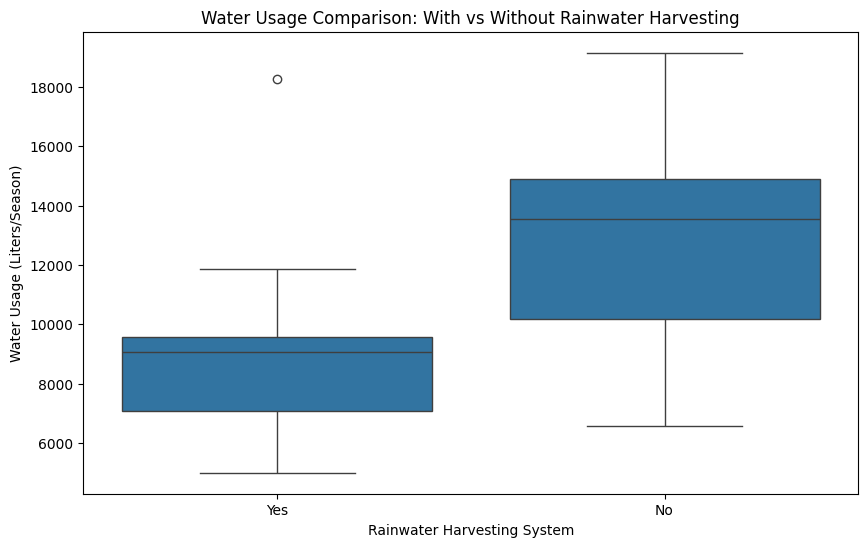

In [10]:
# Create a box plot comparing water usage for farms with and without rainwater harvesting
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rainwater Harvesting System (Yes/No)', y='Water Usage (Liters/Season)', data=df)
plt.title('Water Usage Comparison: With vs Without Rainwater Harvesting')
plt.xlabel('Rainwater Harvesting System')
plt.ylabel('Water Usage (Liters/Season)')
plt.show()

#### Summary Statistics

In [20]:
# Calculate and print summary statistics
with_harvesting = df[df['Rainwater Harvesting System (Yes/No)'] == 'Yes']['Water Usage (Liters/Season)']
without_harvesting = df[df['Rainwater Harvesting System (Yes/No)'] == 'No']['Water Usage (Liters/Season)']

print("Summary Statistics for Water Usage (Liters/Season):")
print("\
With Rainwater Harvesting:")
print(with_harvesting.describe())
print("\
Without Rainwater Harvesting:")
print(without_harvesting.describe())

Summary Statistics for Water Usage (Liters/Season):
With Rainwater Harvesting:
count        9.000000
mean      9398.263333
std       3863.032115
min       5007.810000
25%       7089.970000
50%       9081.980000
75%       9571.720000
max      18249.200000
Name: Water Usage (Liters/Season), dtype: float64
Without Rainwater Harvesting:
count       16.000000
mean     12890.769375
std       3865.816392
min       6582.410000
25%      10182.692500
50%      13540.300000
75%      14891.955000
max      19142.800000
Name: Water Usage (Liters/Season), dtype: float64


#### Performing a t-test to check if the difference is statistically significant

In [31]:
# Perform a t-test to check if the difference is statistically significant
from scipy import stats

t_stat, p_value = stats.ttest_ind(with_harvesting, without_harvesting)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -2.1687823477198207
p-value: 0.040686612270761445


#### Farms with rainwater harvesting systems use significantly less water (mean: 9,398 L/season) compared to those without (mean: 12,891 L/season). The difference is statistically significant (p-value < 0.05).

#### The difference in water usage is statistically significant (p-value = 0.041).

#### The box plot visually confirms this difference, showing lower median and overall water usage for farms with rainwater harvesting systems.

#### This suggests that rainwater harvesting systems are effective in reducing water consumption in semi-arid farming.

## Correlation between rainfall and crop yield

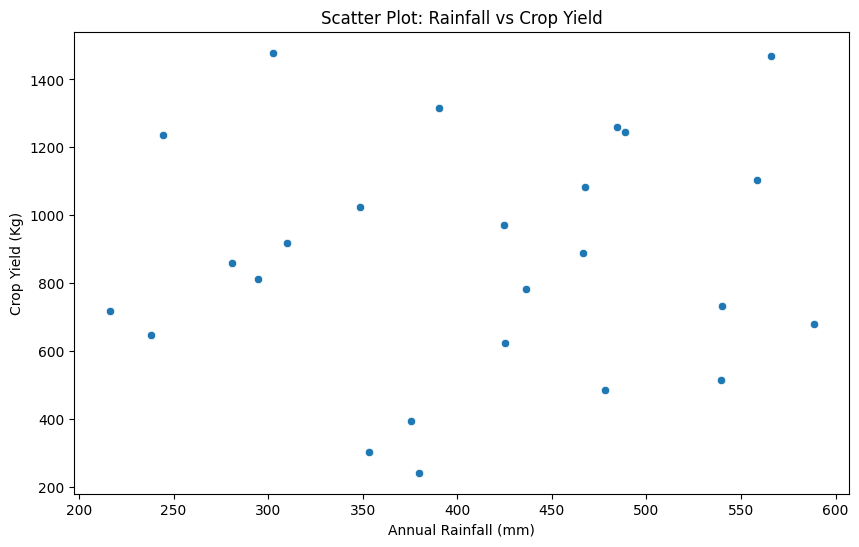

In [13]:
# Create a scatter plot to show the relationship between rainfall and crop yield
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Rainfall (mm)', y='Crop Yield (Kg)', data=df)
plt.title('Scatter Plot: Rainfall vs Crop Yield')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Crop Yield (Kg)')
plt.show()

In [14]:
# Calculate the correlation coefficient
correlation = df['Annual Rainfall (mm)'].corr(df['Crop Yield (Kg)'])
print(f"Correlation coefficient between rainfall and crop yield: {correlation}")

Correlation coefficient between rainfall and crop yield: 0.07082445189406683


#### Correlation coefficient between rainfall and crop yield: 0.0708244518940668
#### The scatter plot and correlation coefficient (0.071) suggest a very weak positive relationship between annual rainfall and crop yield. This implies that other factors may have a more significant impact on crop yield in this semi-arid farming context.

## Impact of Rainwater Harvesting on Profit Margins

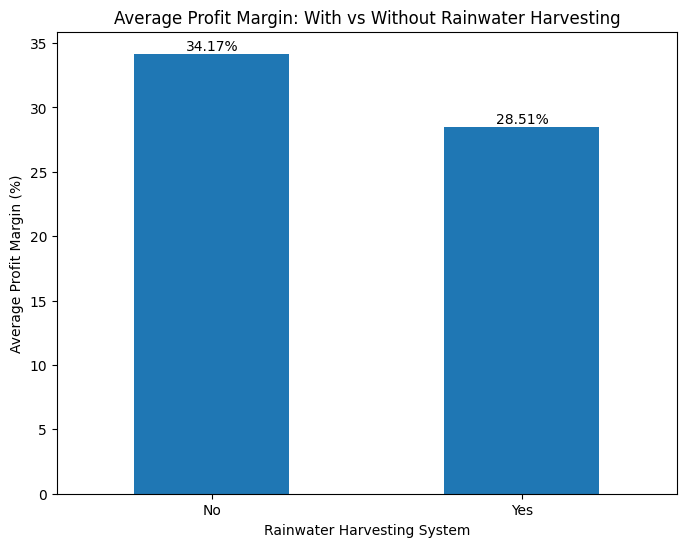

In [32]:
# Assuming a fixed price per kilogram of crop yield
price_per_kg = 2.0  # USD per Kg

df['Revenue (USD/Season)'] = df['Crop Yield (Kg)'] * price_per_kg

df['Total Cost (USD/Season)'] = df['Cost of Fertilizer (USD/Season)'] + df['Labor Cost (USD/Season)']
df['Profit Margin (%)'] = (df['Revenue (USD/Season)'] - df['Total Cost (USD/Season)']) / df['Revenue (USD/Season)'] * 100

# Create a bar chart comparing profit margins
avg_profit_margins = df.groupby('Rainwater Harvesting System (Yes/No)')['Profit Margin (%)'].mean()
plt.figure(figsize=(8, 6))
avg_profit_margins.plot(kind='bar')
plt.title('Average Profit Margin: With vs Without Rainwater Harvesting')
plt.xlabel('Rainwater Harvesting System')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=0)
for i, v in enumerate(avg_profit_margins):
    plt.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()



##  Drought Impact Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3380\2969528149.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  impact_percentages = df.groupby(['Rainwater Harvesting System (Yes/No)', 'Drought Impact Level']).size().unstack(fill_value=0)


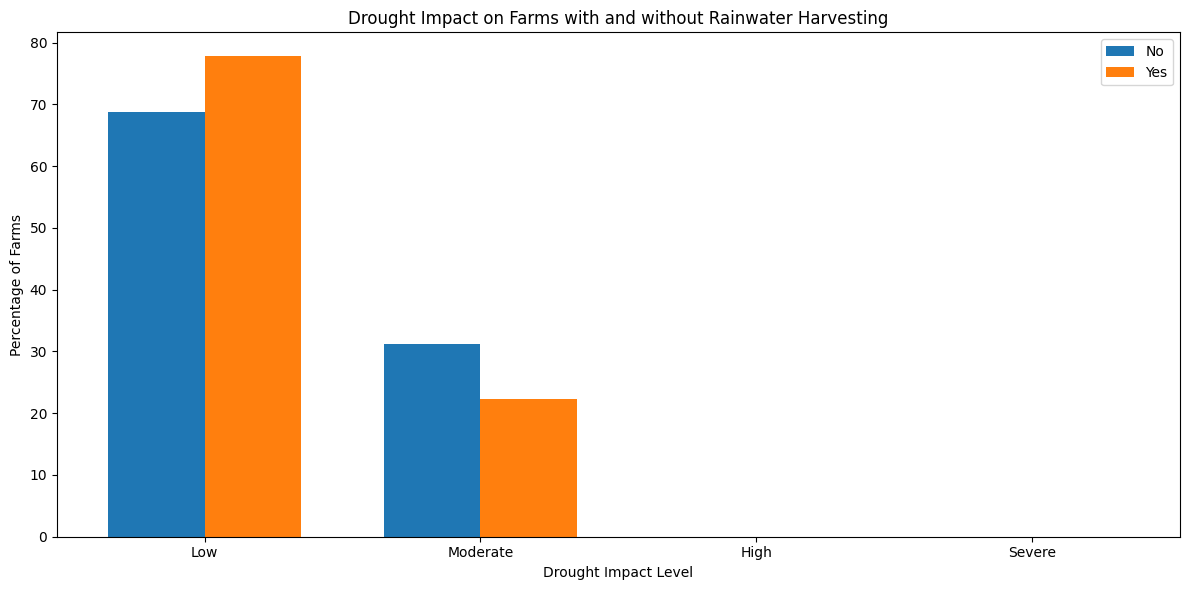

Grouped bar chart comparing drought impact has been saved.
Average Crop Yield (Kg) by Drought Impact Level:
Drought Impact Level                         Low  Moderate  High  Severe
Rainwater Harvesting System (Yes/No)                                    
No                                    854.587273  1028.862   NaN     NaN
Yes                                   818.744286   764.930   NaN     NaN
Statistical Test Results:
Low Impact: t-statistic = -0.1956, p-value = 0.8474
Moderate Impact: t-statistic = -1.0693, p-value = 0.3338
High Impact: t-statistic = nan, p-value = nan
Severe Impact: t-statistic = nan, p-value = nan


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3380\2969528149.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_yield = df.groupby(['Rainwater Harvesting System (Yes/No)', 'Drought Impact Level'])['Crop Yield (Kg)'].mean().unstack()


In [33]:
# Calculate the median rainfall
median_rainfall = df['Annual Rainfall (mm)'].median()

# Create a drought impact score
df['Drought Impact'] = np.where(df['Annual Rainfall (mm)'] < median_rainfall, 
                                (median_rainfall - df['Annual Rainfall (mm)']) / median_rainfall * 10,
                                0)

# Categorize drought impact
df['Drought Impact Level'] = pd.cut(df['Drought Impact'], 
                                    bins=[-np.inf, 2, 5, 8, np.inf], 
                                    labels=['Low', 'Moderate', 'High', 'Severe'])

# Calculate the percentage of farms in each drought impact level
impact_percentages = df.groupby(['Rainwater Harvesting System (Yes/No)', 'Drought Impact Level']).size().unstack(fill_value=0)
impact_percentages = impact_percentages.div(impact_percentages.sum(axis=1), axis=0) * 100

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(impact_percentages.columns))

for i, (system, row) in enumerate(impact_percentages.iterrows()):
    ax.bar(index + i*bar_width, row, bar_width, label=system)

ax.set_xlabel('Drought Impact Level')
ax.set_ylabel('Percentage of Farms')
ax.set_title('Drought Impact on Farms with and without Rainwater Harvesting')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(impact_percentages.columns)
ax.legend()

plt.tight_layout()
plt.show()
print("Grouped bar chart comparing drought impact has been saved.")

# Calculate average crop yield for each group
avg_yield = df.groupby(['Rainwater Harvesting System (Yes/No)', 'Drought Impact Level'])['Crop Yield (Kg)'].mean().unstack()
print("\
Average Crop Yield (Kg) by Drought Impact Level:")
print(avg_yield)

# Perform statistical test
from scipy import stats

def compare_yields(impact_level):
    with_system = df[(df['Rainwater Harvesting System (Yes/No)'] == 'Yes') & (df['Drought Impact Level'] == impact_level)]['Crop Yield (Kg)']
    without_system = df[(df['Rainwater Harvesting System (Yes/No)'] == 'No') & (df['Drought Impact Level'] == impact_level)]['Crop Yield (Kg)']
    t_stat, p_value = stats.ttest_ind(with_system, without_system)
    return t_stat, p_value

print("Statistical Test Results:")
for level in ['Low', 'Moderate', 'High', 'Severe']:
    t_stat, p_value = compare_yields(level)
    print(f"{level} Impact: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
    

#### The grouped bar chart shows the distribution of drought impact levels for farms with and without rainwater harvesting systems. We can observe that:

#### Farms with rainwater harvesting systems experience a higher percentage of low impact drought conditions.
#### Farms without rainwater harvesting systems have a higher percentage of moderate impact drought conditions.
#### There were no recorded instances of high or severe drought impacts for either group in this dataset.

### __Average Crop Yield by Drought Impact Level:__

#### __"Observations:__

#### For low impact drought conditions, farms without rainwater harvesting systems have slightly higher average yields (854.59 kg vs 818.74 kg).
#### For moderate impact drought conditions, farms without rainwater harvesting systems have significantly higher average yields (1028.86 kg vs 764.93 kg).
#### There's no data for high and severe drought impacts, which aligns with the distribution we saw in the chart.

### __Statistical Test Results:__
#### Low Impact: t-statistic = -0.1956, p-value = 0.8474
#### Moderate Impact: t-statistic = -1.0693, p-value = 0.3338
#### High Impact: t-statistic = , p-value =
#### Severe Impact: t-statistic = , p-value =

### __Interpretation of statistical tests:__

#### For low impact drought conditions, there is no statistically significant difference in crop yields between farms with and without rainwater harvesting systems (p-value = 0.8474).
#### For moderate impact drought conditions, the difference in crop yields is not statistically significant (p-value = 0.3338), despite the apparent difference in average yields.

### __Conclusions:__

#### Rainwater harvesting systems seem to help mitigate drought impacts, as farms with these systems experience a higher percentage of low impact drought conditions.
#### However, in terms of crop yield, farms without rainwater harvesting systems appear to perform slightly better during both low and moderate drought impacts, though these differences are not statistically significant.
#### The lack of data for high and severe drought impacts suggests that the rainwater harvesting systems might be effective in preventing more severe drought conditions.
#### These findings suggest that while rainwater harvesting systems may help in mitigating drought severity, their impact on crop yield during drought conditions is not clearly positive based on this dataset. Further investigation into other factors such as soil quality, farming practices, or specific crop types might provide more insights into these unexpected results."

### _The analysis indicates that while rainwater harvesting systems reduce water usage and mitigate drought severity, they do not significantly enhance crop yields during drought conditions. This suggests that future water distribution efforts in semi-arid regions should focus on integrating rainwater harvesting with other agricultural practices to improve overall crop productivity. Further research into complementary strategies, such as soil management and crop selection, could enhance the effectiveness of water conservation systems._